# ReadMe:각 파일의 처음 6가지 요건(데이터 로딩, 결측치 확인, 결측치 제거, 레이블 확인, 숫자, 엔코딩)은 동일하므로 교수님은 알고리즘 평가를 위해 마지막까지 끌어내리시기 바랍니다

# Import library

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# 데이터 로딩과 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


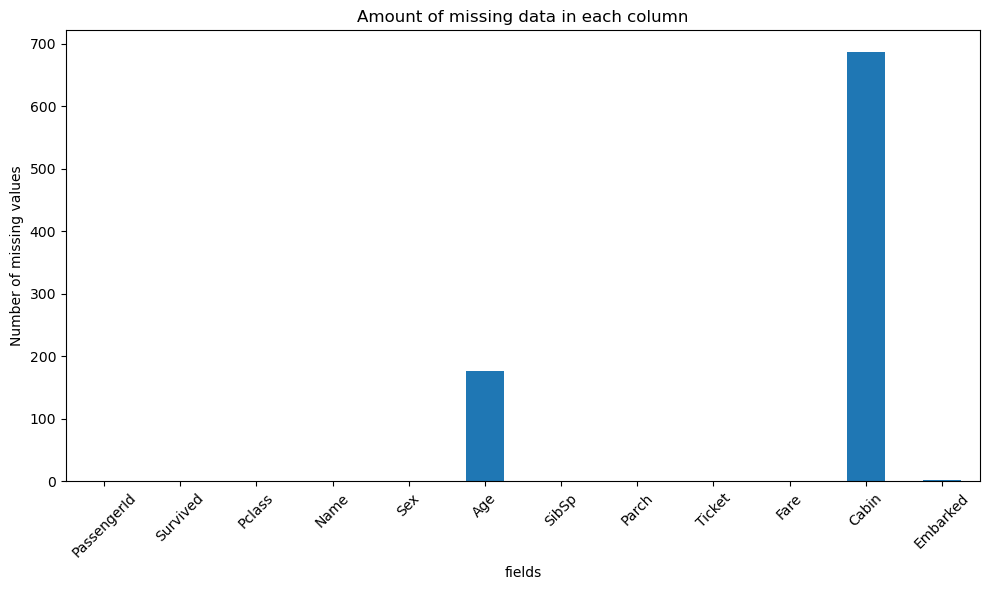

In [110]:
#교수의 github URL 로딩
df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/titanic.csv")

#각 열에서 누락된 값의 개수 확인하기
miss_data = df.isnull().sum()
print(miss_data)

plt.figure(figsize=(10, 6)) 
miss_data.plot(kind='bar') 
plt.title('Amount of missing data in each column') 
plt.xlabel('fields')  
plt.ylabel('Number of missing values')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

# 결측치 제거 (Age인 경우 평균나이로, Embarked column: 가장 일반적인 값으로 대체한다, Cabin column: 기본값 "Unknown"로 대체한다)


In [112]:
#Age인 경우 평균나이로
mean_age = df['Age'].mean()
mean_round = round(mean_age)
print(f"Mean of Age: {mean_round}")
df['Age'] = df['Age'].fillna(mean_round)
print(df['Age'])

Mean of Age: 30
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [113]:
#Embarked column: 가장 일반적인 값으로 대체한다
mode_embarked = df['Embarked'].mode()[0]
print(f"Mode_embarked: {mode_embarked}")
df["Embarked"] = df["Embarked"].fillna(mode_embarked)

Mode_embarked: S


In [114]:
#Cabin column: 기본값 "Unknown"로 대체한다
df["Cabin"] = df["Cabin"].fillna("Unknown")

In [119]:
#확인
print(df[['Embarked', 'Age', 'Cabin']].isnull().sum())

Embarked    0
Age         0
Cabin       0
dtype: int64


# 이 경우, 우리는 Survived 열을 레이블로 사용할 것입니다. 그 이유는 우리의 목표가 다른 특성에 따른 생존자 비율을 분석하는 것이기 때문입니다. 중요한 점은 생존자 비율과 사망자 비율 사이의 균형을 맞추는 것입니다. 데이터의 불균형을 피하기 위해 Survived를 레이블로 사용하는 것이 적합합니다.

In [122]:
people_total = df["PassengerId"].count()
print(f" people_total : {people_total}")
print("--------------------------------------")
died_count = df[df['Survived'] == 0]['PassengerId'].count()
survived_count = df[df['Survived'] == 1]['PassengerId'].count()
print(f"died : {died_count}")
print(f"survived : {survived_count}")
print("--------------------------------------------")
died_percent = round((died_count /  people_total) * 100,2)
survived_percent = round((survived_count /  people_total) * 100,2)
print(f"died_percent: {died_percent}%")
print(f"survived_percent: {survived_percent}%")


 people_total : 891
--------------------------------------
died : 549
survived : 342
--------------------------------------------
died_percent: 61.62%
survived_percent: 38.38%


# 생존자와 사망자수를 나타내는 도표

Text(0.5, 1.0, 'a chart showing the number of survivors and deaths')

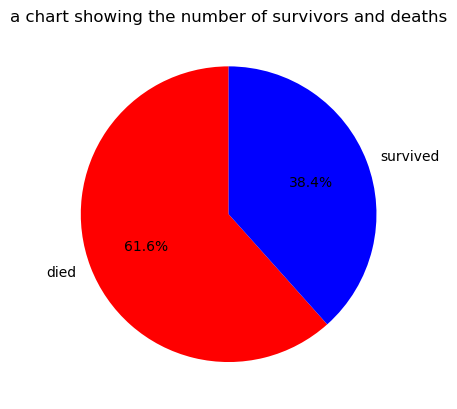

In [125]:
labels = ['died','survived']
sizes = [died_percent,survived_percent]
color = ['red','blue']
plt.pie(sizes, labels = labels, autopct='%1.1f%%', colors = color, startangle=90)
plt.title("a chart showing the number of survivors and deaths")

# 제거할 수 있는 열은 다음과 같습니다:

# PassengerId: 각 승객을 위한 고유 식별 번호일 뿐이며, 생존 여부와 관련이 없습니다.
# Name: 승객의 이름은 생존 가능성에 영향을 미치지 않습니다.
# Ticket: 명확한 구조가 없어 유용한 정보를 추론하기 어렵습니다.
# Cabin: 많은 데이터가 누락되어 있어 신뢰도가 낮습니다.
# 우리는 이러한 불필요한 필드를 제거하여 분석 속도를 향상시키고, 데이터 크기를 줄이며, 메모리를 절약할 수 있습니다.

In [128]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns = columns_to_drop)
print(df.head(5))

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


# Sex 및 Embarked 열을 숫자 형태로 인코딩해야 합니다. 대부분의 머신러닝 알고리즘은 숫자 데이터를 필요로 하기 때문입니다. 숫자로 변환하면 알고리즘이 데이터를 더 쉽게 이해하고 처리할 수 있을 뿐만 아니라 계산 속도가 향상되고 모델 최적화에도 도움이 됩니다.

In [131]:
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

# column sex encoding, male -> 1, female -> 0
df['Sex'] = label_encoder_sex.fit_transform(df['Sex'])
sex_mapping = dict(zip(label_encoder_sex.classes_, label_encoder_sex.transform(label_encoder_sex.classes_)))
print("Mapping of Sex:")
print(sex_mapping)

#column Embarked encoding, 
df['Embarked'] = label_encoder_embarked.fit_transform(df['Embarked'])
embarked_mapping = dict(zip(label_encoder_embarked.classes_, label_encoder_embarked.transform(label_encoder_embarked.classes_)))
print("Mapping of Embarked:")
print(embarked_mapping)

Mapping of Sex:
{'female': 0, 'male': 1}
Mapping of Embarked:
{'C': 0, 'Q': 1, 'S': 2}


In [133]:
print(df.head(5))

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


# **데이터를 처리한 후에 Logistic Regression를 적용한다.

In [136]:
X = df.drop(columns=['Survived'])  # features
y = df['Survived']                 # label

# train = 80% , test = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)



#train model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LR model 생성
model = LogisticRegression(penalty="l1", solver="saga", C=0.5, max_iter=200, random_state=42)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}")



accuracy: 80.45


# Confusion Matrix

Accuracy: 80.45%
Precision: 78.26%
Recall: 72.97%
F1-Score: 75.52%


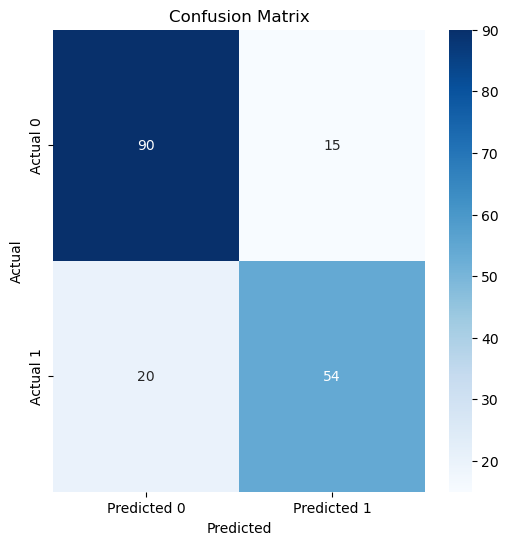

In [140]:
cm = confusion_matrix(y_test, y_pred)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 영향을 미치는 요소들

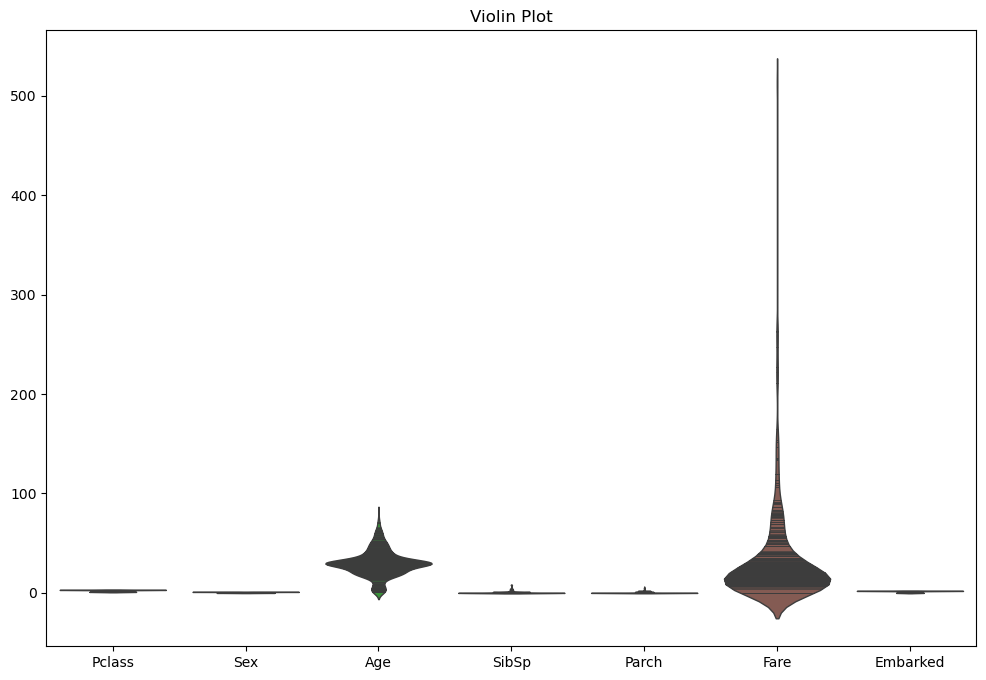

In [143]:

df = pd.DataFrame(X)


plt.figure(figsize=(12, 8))
sns.violinplot(data=df, inner="stick", linewidth=1)
plt.title('Violin Plot')
plt.show()

# Age는 탑승객들의 나이가 매우 다양하기 때문에 분포가 넓을 수 있습니다. 탑승객들은 어린 아이부터 고령자까지 다양한 연령대를 포함하고 있기 때문입니다.
# Fare는 Titanic의 각기 다른 등급의 티켓 가격 차이로 인해 분포가 넓고 매우 높을 수 있습니다. 1등석과 3등석의 티켓 가격 차이가 매우 크기 때문에, 일부 승객들은 매우 높은 가격을 지불했을 것입니다.
# Sex를 제외한 이 두 요인도 Titanic에서 살아남을 확률과 사망 확률에 큰 영향을 미쳤을 것입니다.